In [1]:
from google.colab import files
uploaded = files.upload()


Saving chicago_taxi_sample.csv to chicago_taxi_sample.csv


In [3]:
import pandas as pd

df = pd.read_csv("chicago_taxi_sample.csv")
df.head()


,trip_miles,trip_seconds,tips,trip_total
0,8.89,762,9.06,36.83
1,3.48,448,1.00,13.94
2,9.63,2369,4.17,45.03
3,3.67,1697,1.59,22.93
4,7.45,2289,1.22,36.39


   trip_miles  trip_seconds  tips  trip_total
0        8.89           762  9.06       36.83
1        3.48           448  1.00       13.94
2        9.63          2369  4.17       45.03
3        3.67          1697  1.59       22.93
4        7.45          2289  1.22       36.39

Model Coefficients: [2.11431435 0.00673406 1.07750159]
Model Intercept: 3.363403340840449
R² Score: 0.9619517802584504
MSE: 1.233479300279017
MAE: 1.04443111137805


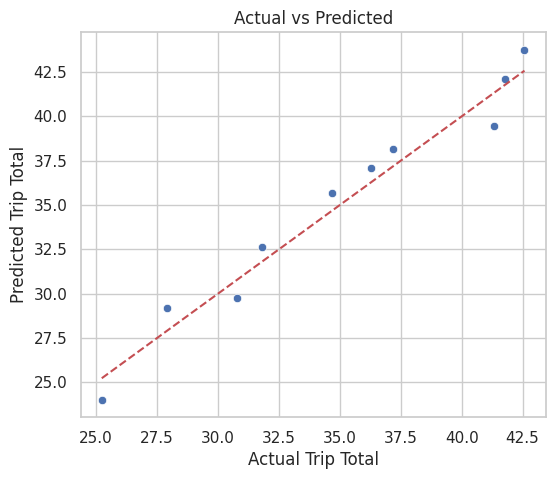

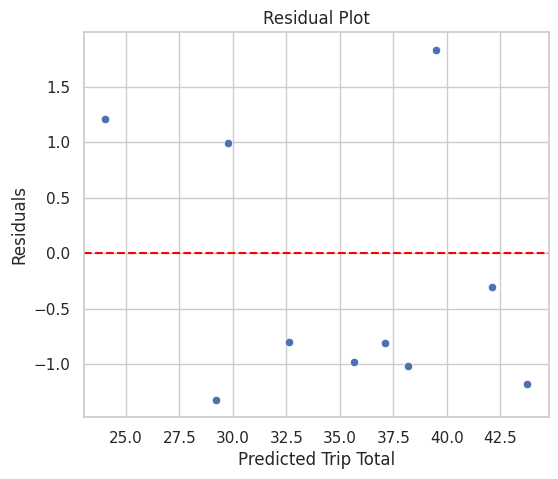

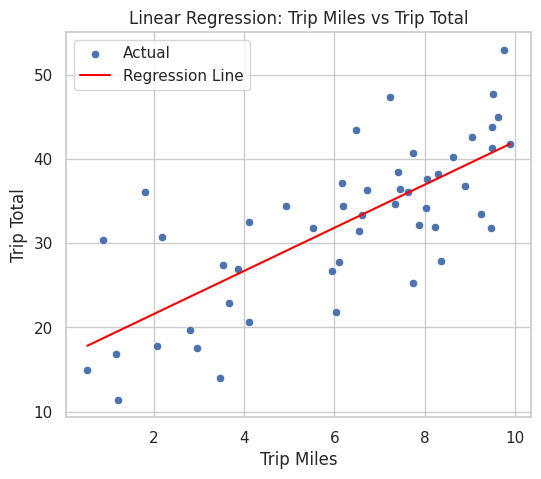

In [7]:
# 📌 IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set(style='whitegrid')

# 📥 LOAD YOUR DATA
df = pd.read_csv("chicago_taxi_sample.csv")
print(df.head())

# 🎯 FEATURES & TARGET
X = df[['trip_miles', 'trip_seconds', 'tips']]
y = df['trip_total']

# 🔀 SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 MODEL
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 EVALUATION
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# ✅ GRAPH 1: Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Trip Total")
plt.ylabel("Predicted Trip Total")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# ✅ GRAPH 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Trip Total")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# ✅ GRAPH 3: Linear Regression Line for trip_miles
sorted_df = df.sort_values("trip_miles")
X_miles = sorted_df[["trip_miles"]]
y_miles = sorted_df["trip_total"]

# Simple model for 1 feature
model_miles = LinearRegression()
model_miles.fit(X_miles, y_miles)
y_miles_pred = model_miles.predict(X_miles)

# Plot regression line
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_miles.squeeze(), y=y_miles, label="Actual")
plt.plot(X_miles, y_miles_pred, color="red", label="Regression Line")
plt.xlabel("Trip Miles")
plt.ylabel("Trip Total")
plt.title("Linear Regression: Trip Miles vs Trip Total")
plt.legend()
plt.grid(True)
plt.show()
